In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Prepare DF

In [72]:
gmr = pd.read_csv("grand_master_report.csv")
gmr.head()

,Day\nDate,DayoftheWeek\n,TotalSupply,MealsSaved,SavedRatio,SavedRatioEx.Manufacturer,DeclaredSupply,AddedSupply,SubtractedSupply,PaidMeals,...,SupplyingStoresManufacturer,NewSavingStoresManufacturer,NewSupplyingStoresManufacturer,SavingStoresManufacturer,ChurnedStoresManufacturer,NotSupplyingStoresManufacturer,SupplyingStoresLostManufacturer,ResupplyingStoresManufacturer,Avg.MealsSavedperPayingUser,ActiveUsers
0,19.02.22,Saturday,10160,7411,"72,94%","73,38%",9554,1836,-955,7387,...,59,0,0,53,0,341,60,14,"1,71",46326
1,18.02.22,Friday,11705,7900,"67,49%","67,99%",11134,2031,-1221,7885,...,105,0,0,92,0,295,18,26,"1,32",48647
2,17.02.22,Thursday,11756,7819,"66,51%","67,46%",10980,2141,-1151,7798,...,97,0,0,81,0,303,33,16,"1,28",50662
3,16.02.22,Wednesday,11756,7925,"67,41%","67,93%",10900,2152,-1069,7910,...,114,0,0,102,0,285,22,31,"1,29",51943
4,15.02.22,Tuesday,11797,8079,"68,48%","69,75%",10927,2164,-1081,8055,...,105,0,0,90,0,294,14,31,"1,26",52472


In [73]:
gmr["Day\nDate"] = pd.to_datetime(gmr["Day\nDate"], format='%d.%m.%y')

In [74]:
gmr = gmr.rename(columns={"Day\nDate": "Date"})

In [75]:
gmr.dtypes

Date                               datetime64[ns]
DayoftheWeek\n                             object
TotalSupply                                 int64
MealsSaved                                  int64
SavedRatio                                 object
SavedRatioEx.Manufacturer                  object
DeclaredSupply                              int64
AddedSupply                                 int64
SubtractedSupply                            int64
PaidMeals                                   int64
RefundedMeals                               int64
FreeMeals                                   int64
RefundRatio                                object
StoreCancellationRatio                     object
ConsumerCancellationRatio                  object
AverageRatingOverall                       object
NewRegisteredUsers                          int64
All-TimeRegisteredUsers                     int64
PayingUsers                                 int64
NewPayingUsers                              int64


In [76]:
gmr_users = gmr[["Date", 
     "TotalSupply",
     "MealsSaved",
     "NewRegisteredUsers",
     "All-TimeRegisteredUsers", 
     "PayingUsers", 
     "NewPayingUsers", 
     "All-TimePayingUsers", 
     "ActiveUsers"]]

In [77]:
gmr_users = gmr_users.sort_index(ascending=False)

In [78]:
gmr_users.head(3)

,Date,TotalSupply,MealsSaved,NewRegisteredUsers,All-TimeRegisteredUsers,PayingUsers,NewPayingUsers,All-TimePayingUsers,ActiveUsers
499,2020-10-08,7514,5182,1455,1002213,4186,587,243006,47527
498,2020-10-09,7934,5542,1487,1003693,4060,473,243479,34784
497,2020-10-10,6757,4961,2813,1006490,3103,502,243981,34595


In [79]:
#gmr_users = gmr_users.set_index("Date")

In [80]:
gmr_users.sort_values(by = 'Date',inplace=True)

### Split DF

In [81]:
gmr_NRU = gmr_users[["Date","NewRegisteredUsers"]].set_index("Date")
gmr_PU = gmr[["Date","PayingUsers"]].set_index("Date")
gmr_AU = gmr[["Date","ActiveUsers"]].set_index("Date")

In [82]:
gmr_PU =gmr_PU.sort_index(ascending = True)
gmr_AU =gmr_AU.sort_index(ascending = True)

In [83]:
gmr_users.tail()

,Date,TotalSupply,MealsSaved,NewRegisteredUsers,All-TimeRegisteredUsers,PayingUsers,NewPayingUsers,All-TimePayingUsers,ActiveUsers
4,2022-02-15,11797,8079,1009,1641097,6425,507,476544,52472
3,2022-02-16,11756,7925,1057,1642153,6156,512,477056,51943
2,2022-02-17,11756,7819,982,1643133,6118,492,477548,50662
1,2022-02-18,11705,7900,895,1644027,5963,464,478012,48647
0,2022-02-19,10160,7411,954,1644979,4324,391,478403,46326


In [84]:
gmr_NRU.head(3)

,NewRegisteredUsers
Date,
2020-10-08,1455
2020-10-09,1487
2020-10-10,2813


In [85]:
gmr_PU.head(3)

,PayingUsers
Date,
2020-10-08,4186
2020-10-09,4060
2020-10-10,3103


In [86]:
gmr_AU.head(3)

,ActiveUsers
Date,
2020-10-08,47527
2020-10-09,34784
2020-10-10,34595


# Visualize Data

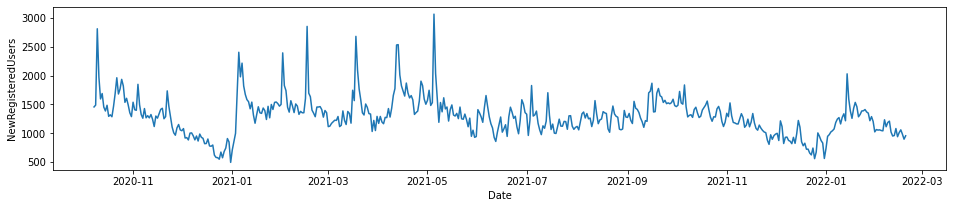

In [87]:
plt.figure(figsize=(16, 3))
import seaborn as sns
sns.lineplot(data = gmr_users, x = 'Date', y = "NewRegisteredUsers");

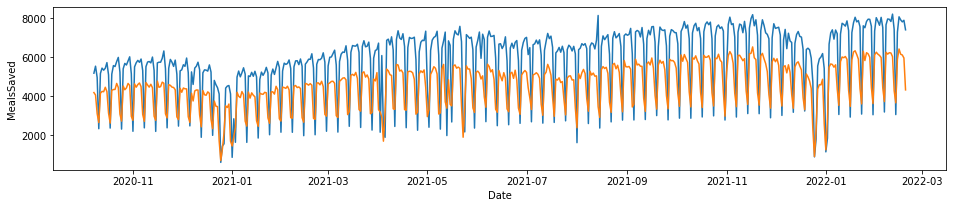

In [88]:
plt.figure(figsize=(16, 3))
sns.lineplot(data = gmr_users, x = 'Date', y = "MealsSaved")
sns.lineplot(data = gmr_users, x = 'Date', y = "PayingUsers");

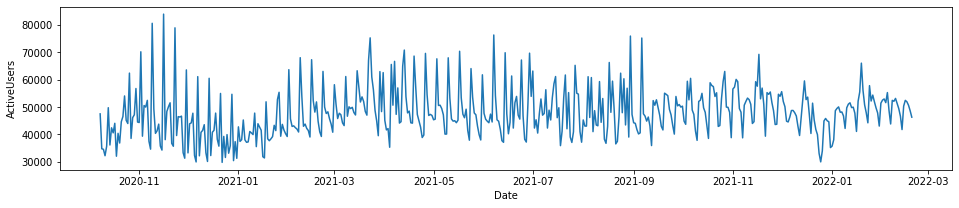

In [89]:
plt.figure(figsize=(16, 3))
sns.lineplot(data = gmr_users, x = 'Date', y = "ActiveUsers");

# Model Prep

### Train Test split (30% for test)

#### New Registered Users

In [90]:
train_size = 0.7
index_NRU = round(train_size*gmr_NRU.shape[0])
NRU_train = gmr_NRU.iloc[:index_NRU]
NRU_test = gmr_NRU.iloc[index_NRU:]

In [91]:
NRU_train.shape

(350, 1)

#### Paying Users

In [92]:
train_size = 0.7
index_PU = round(train_size*gmr_PU.shape[0])
PU_train = gmr_PU.iloc[:index_PU]
PU_test = gmr_PU.iloc[index_PU:]

#### Active Users

In [93]:
train_size = 0.7
index_AU = round(train_size*gmr_AU.shape[0])
AU_train = gmr_AU.iloc[:index_AU]
AU_test = gmr_AU.iloc[index_AU:]

### Baseline

#### New Registered Users

In [94]:
y_pred_NRU = NRU_test.shift(1).dropna()
y_true_NRU = NRU_test[1:]
print(f"R2:{r2_score(y_true_NRU, y_pred_NRU)}")

mse = mean_squared_error(y_true_NRU, y_pred_NRU)
print('MSE: %f' % mse)

mae = mean_absolute_error(y_true_NRU, y_pred_NRU)
print('MAE: %f' % mae)

mse = mean_squared_error(y_true_NRU, y_pred_NRU)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

R2:0.697296319827461
MSE: 20288.798658
MAE: 101.281879
RMSE: 142.438754


#### Paying Users

In [95]:
y_pred_PU = PU_test.shift(1).dropna()
y_true_PU = PU_test[1:]
print(f"R2:{r2_score(y_true_PU, y_pred_PU)}")

mse = mean_squared_error(y_true_PU, y_pred_PU)
print('MSE: %f' % mse)

mae = mean_absolute_error(y_true_PU, y_pred_PU)
print('MAE: %f' % mae)

mse = mean_squared_error(y_true_PU, y_pred_PU)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

R2:-0.02136775385833878
MSE: 1356772.691275
MAE: 813.711409
RMSE: 1164.805860


#### Active Users

In [96]:
y_pred_AU = AU_test.shift(1).dropna()
y_true_AU = AU_test[1:]
print(f"R2:{r2_score(y_true_AU, y_pred_AU)}")

mse = mean_squared_error(y_true_AU, y_pred_AU)
print('MSE: %f' % mse)

mae = mean_absolute_error(y_true_AU, y_pred_AU)
print('MAE: %f' % mae)

mse = mean_squared_error(y_true_AU, y_pred_AU)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

R2:0.009632241008213804
MSE: 40898222.530201
MAE: 4644.167785
RMSE: 6395.171814


### Decomposition

Additive Decomposition (y = Trend + Seasonal + Residuals)

Multiplicative Decomposition (y = Trend * Seasonal * Residuals)

#### New Registered Users

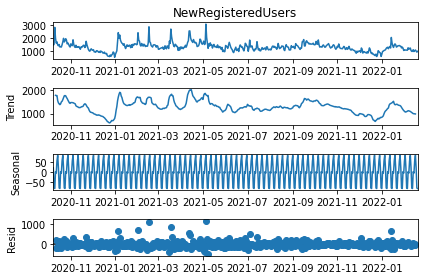

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(gmr_NRU['NewRegisteredUsers'], model='additive')
result_add.plot();

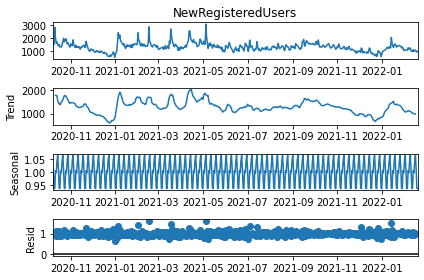

In [98]:
result_mul = seasonal_decompose(gmr_NRU['NewRegisteredUsers'], model='multiplicative')
result_mul.plot();

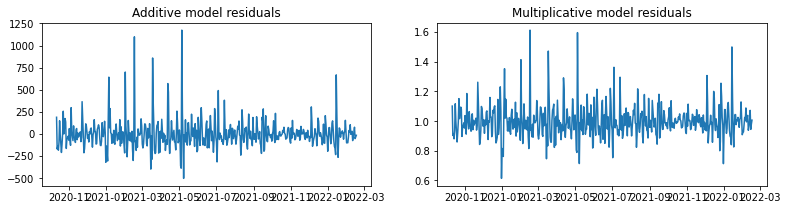

In [99]:
# Plot the residuals with "result_add.resid" to decide
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

#### Paying Users

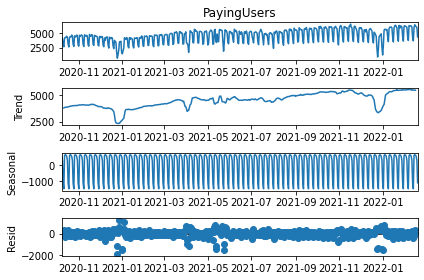

In [100]:
result_add = seasonal_decompose(gmr_PU['PayingUsers'], model='additive')
result_add.plot();

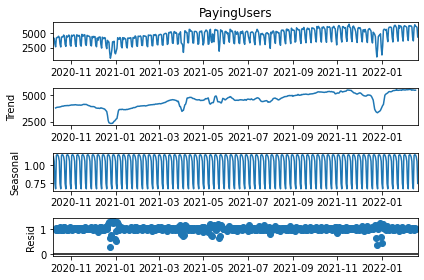

In [101]:
result_mul = seasonal_decompose(gmr_PU['PayingUsers'], model='multiplicative')
result_mul.plot();

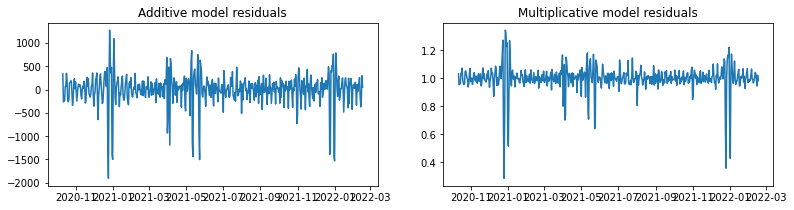

In [102]:
# Plot the residuals with "result_add.resid" to decide
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

#### Active Users

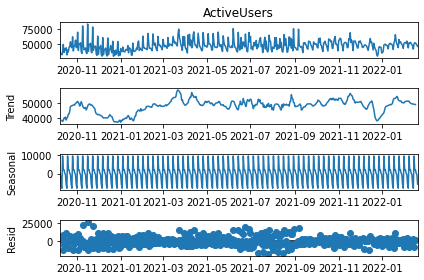

In [103]:
result_add = seasonal_decompose(gmr_AU['ActiveUsers'], model='additive')
result_add.plot();

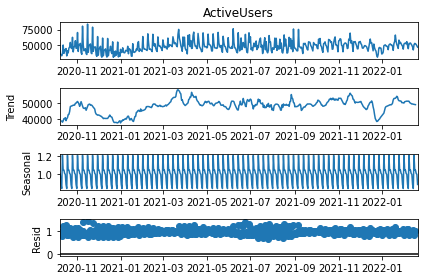

In [104]:
result_mul = seasonal_decompose(gmr_AU['ActiveUsers'], model='multiplicative')
result_mul.plot();

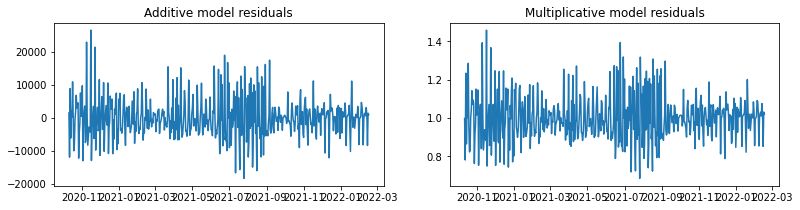

In [105]:
# Plot the residuals with "result_add.resid" to decide
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

### Test Stationarity ADF-Tests

#### New Registered Users

In [106]:
from statsmodels.tsa.stattools import adfuller

adfuller(gmr_NRU.NewRegisteredUsers)[1]  # p-value

0.00040751891794887706

In [107]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  3.6680258428939885e-21
multipl resid:  5.012017931480165e-06


#### Paying Users

In [108]:
adfuller(gmr_PU.PayingUsers)[1]  # p-value

0.3248476023546298

In [109]:
PU_diff = gmr_PU.PayingUsers.diff(1).dropna()
adfuller(PU_diff)[1]

7.980109576235702e-12

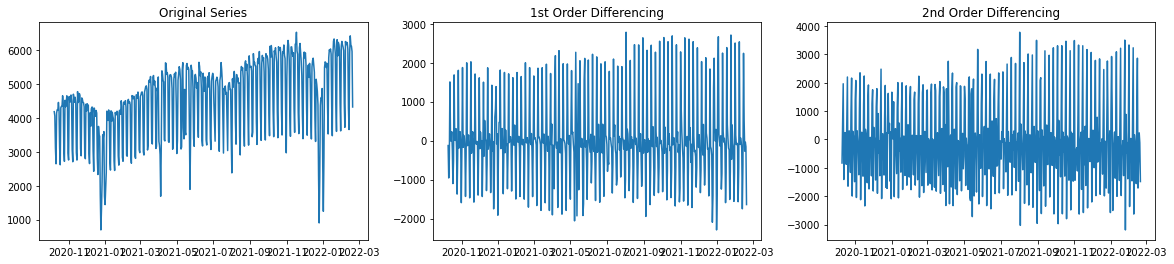

In [110]:
zero_diff = gmr_PU.PayingUsers
first_order_diff = gmr_PU.PayingUsers.diff(1)
second_order_diff = gmr_PU.PayingUsers.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

In [111]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  3.6680258428939885e-21
multipl resid:  5.012017931480165e-06


#### Active Users

In [112]:
adfuller(gmr_AU.ActiveUsers)[1]  # p-value

0.042078106978028565

In [113]:
AU_diff = gmr_AU.ActiveUsers.diff(1).dropna()
adfuller(AU_diff)[1]

5.828324754469774e-18

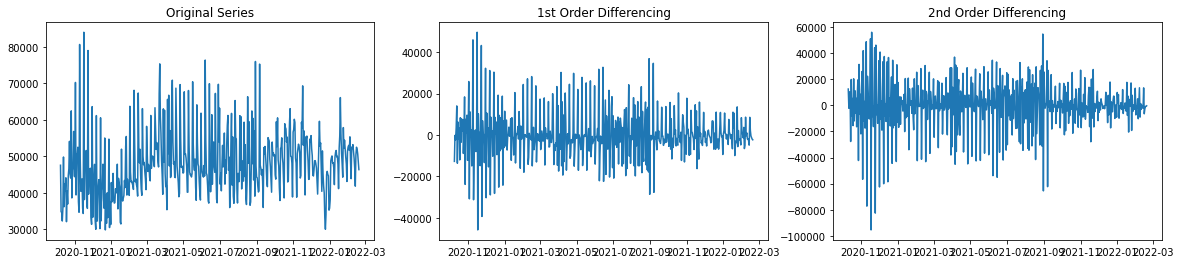

In [114]:
zero_diff = gmr_AU.ActiveUsers
first_order_diff = gmr_AU.ActiveUsers.diff(1)
second_order_diff = gmr_AU.ActiveUsers.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

In [115]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  3.6680258428939885e-21
multipl resid:  5.012017931480165e-06


### Autocorrelation - ACF and PACF

#### New Registered Users

In [116]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

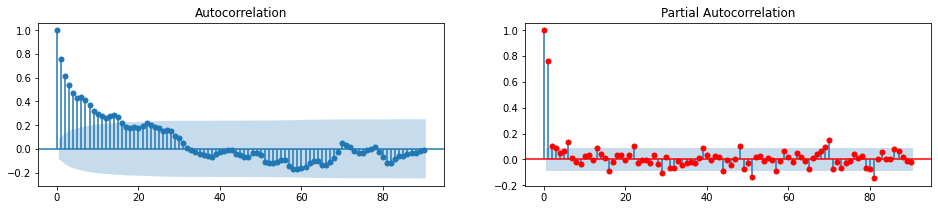

In [117]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(gmr_NRU.NewRegisteredUsers, lags=90, ax=axes[0]);
plot_pacf(gmr_NRU.NewRegisteredUsers, lags=90, ax=axes[1], color='r');

#### Paying Users

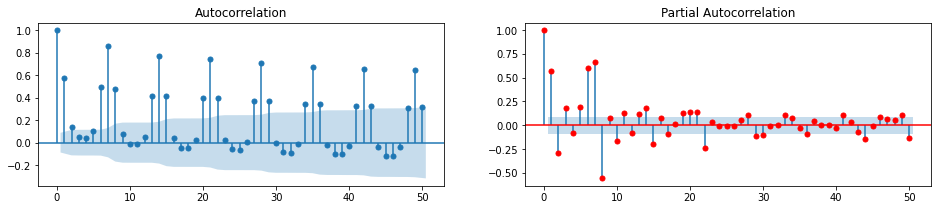

In [118]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(gmr_PU.PayingUsers, lags=50, ax=axes[0]);
plot_pacf(gmr_PU.PayingUsers, lags=50, ax=axes[1], color='r');

#### Active Users

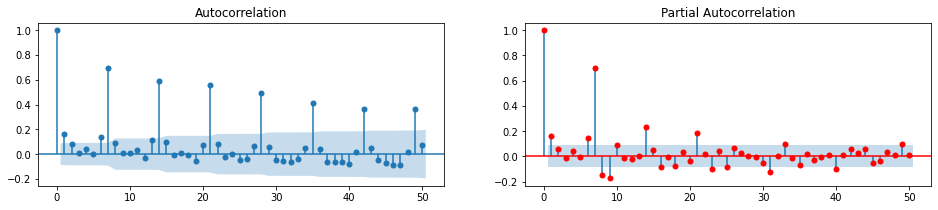

In [119]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(gmr_AU.ActiveUsers, lags=50, ax=axes[0]);
plot_pacf(gmr_AU.ActiveUsers, lags=50, ax=axes[1], color='r');

# ARIMA

In [120]:
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [121]:
import statsmodels

## New Registered Users

### Training

#### Stationarize Data

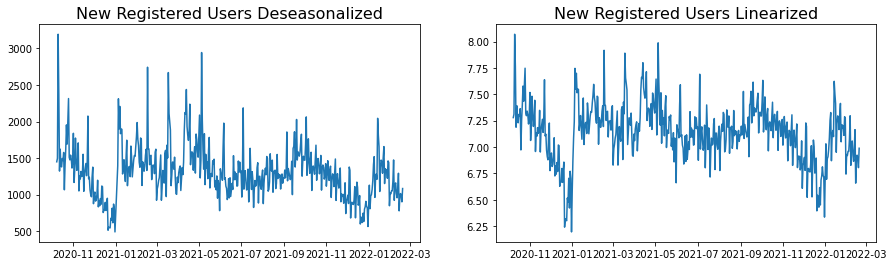

In [122]:
# Let's remove seasons
gmr_NRU['deseasonalized'] = gmr_NRU.NewRegisteredUsers.values/result_mul.seasonal

plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(gmr_NRU.deseasonalized);
plt.title('New Registered Users Deseasonalized', fontsize=16);

# Also remove exponential trend 
gmr_NRU['linearized'] = np.log(gmr_NRU['deseasonalized'])

plt.subplot(1,2,2); plt.plot(gmr_NRU['linearized'])
plt.title('New Registered Users Linearized', fontsize=16);

Text(0.5, 1.0, '2nd Order Differencing')

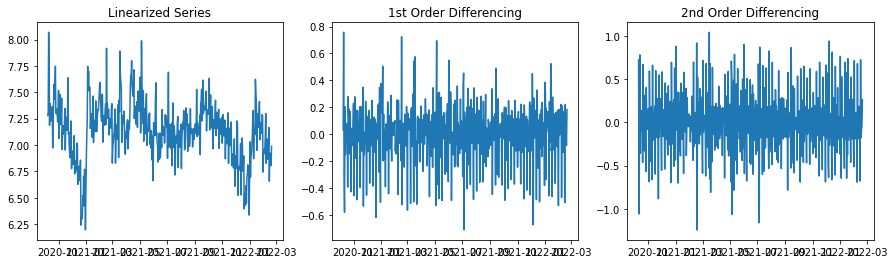

In [123]:
# Let's difference this and look at the ACFs
fig, axes = plt.subplots(1, 3,figsize=(15,4))

axes[0].plot(gmr_NRU['linearized']); axes[0].set_title('Linearized Series')
# 1st Differencing
y_diff_NRU = gmr_NRU['linearized'].diff().dropna()
axes[1].plot(y_diff_NRU); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
y_diff_diff_NRU = gmr_NRU['linearized'].diff().diff().dropna()
axes[2].plot(y_diff_diff_NRU); axes[2].set_title('2nd Order Differencing')

In [124]:
# check with ADF Test for stationarity
print('p-value zero-diff: ', adfuller(gmr_NRU['linearized'])[1])
print('p-value first-diff: ', adfuller(gmr_NRU['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(gmr_NRU['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.006101191439561008
p-value first-diff:  3.660532427615205e-10
p-value second-diff:  2.454645311738476e-12


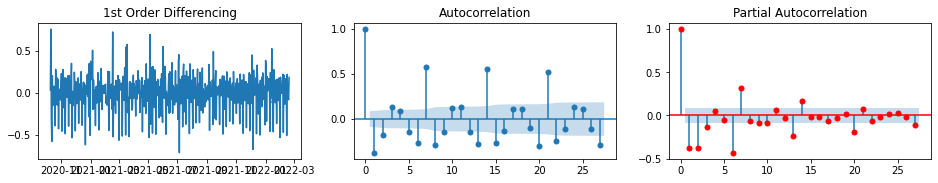

In [125]:
# ACF / PACF analysis of y_diff linearized
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff_NRU); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff_NRU, ax=axes[1]);
plot_pacf(y_diff_NRU, ax=axes[2], c='r');

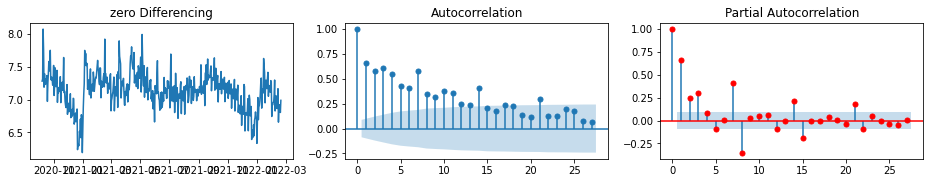

In [126]:
#gmr_NRU['linearized']
# ACF / PACF analysis of zero diff linearized
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(gmr_NRU['linearized']); axes[0].set_title('zero Differencing')
plot_acf(gmr_NRU['linearized'], ax=axes[1]);
plot_pacf(gmr_NRU['linearized'], ax=axes[2], c='r');

#### Train model

In [127]:
arima_NRU = ARIMA(gmr_NRU['linearized'], order=(3,1,9))
arima = arima_NRU.fit()
arima.summary()

/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.83095D-01    |proj g|=  5.58717D-02

At iterate    5    f= -3.85768D-01    |proj g|=  1.19769D-02

At iterate   10    f= -3.95458D-01    |proj g|=  1.04664D-01

At iterate   15    f= -3.98111D-01    |proj g|=  1.90419D-01

At iterate   20    f= -4.05837D-01    |proj g|=  1.07660D-01

At iterate   25    f= -4.07274D-01    |proj g|=  2.92274D-02

At iterate   30    f= -4.09849D-01    |proj g|=  8.46947D-02

At iterate   35    f= -4.10906D-01    |proj g|=  1.26251D-02

At iterate   40    f= -4.11713D-01    |proj g|=  2.28405D-01

At iterate   45    f= -4.12183D-01    |proj g|=  2.07785D-02

At iterate   50    f= -4.12277D-01    |proj g|=  5.78846D-02

At iterate   55    f= -4.12760D-01    |proj g|=  2.86093D-01

At iterate   60    f= -4.16233D-01    |proj g|=  9.91639D-02

At iterate   65    f= -4.1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  475    f= -4.26222D-01    |proj g|=  1.73961D-03

At iterate  480    f= -4.26222D-01    |proj g|=  2.94766D-02

At iterate  485    f= -4.26223D-01    |proj g|=  2.08368D-03

At iterate  490    f= -4.26223D-01    |proj g|=  4.22012D-04

At iterate  495    f= -4.26223D-01    |proj g|=  2.47721D-03

At iterate  500    f= -4.26223D-01    |proj g|=  1.06888D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13    500    744      2     0     0   1.069D-03  -4.262D-01
  F = -0.42622296176013630     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.linearized   No. Observations:                  499
Model:                 ARIMA(3, 1, 9)   Log Likelihood                 212.685
Method:                       css-mle   S.D. of innovations              0.157
Date:                Fri, 19 Aug 2022   AIC                           -397.371
Time:                        10:04:05   BIC                           -338.394
Sample:                    10-09-2020   HQIC                          -374.226
                         - 02-19-2022                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0010      0.003     -0.336      0.737      -0.007       0.005
ar.L1.D.linearized    -1.0110      0.000  -7041.468      0.000      -1.011      -1.011
ar.L2.D.linearized    -1.2518        nan        nan        nan         nan         nan
ar.L3.D.linearized    -0.5664      0.001   -668.761      0.000      -0.568      -0.565
ma.L1.D.linearized     0.5763      0.045     12.864      0.000       0.488       0.664
ma.L2.D.linearized     0.8510      0.058     14.673      0.000       0.737       0.965
ma.L3.D.linearized    -0.0721      0.062     -1.154      0.248      -0.195       0.050
ma.L4.D.linearized    -0.4685      0.067     -7.043      0.000      -0.599      -0.338
ma.L5.D.linearized    -0.2238      0.077     -2.907      0.004      -0.375      -0.073
ma.L6.D.linearized    -0.3121      0.075     -4.151      0.000      -0.459      -0.165
ma.L7.D.linearized     0.0910      0.072      1.267      0.205      -0.050       0.232
ma.L8.D.linearized    -0.0292      0.058     -0.502      0.616      -0.143       0.085
ma.L9.D.linearized     0.1467      0.045      3.246      0.001       0.058       0.235
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2223           -0.9750j            1.0000           -0.2857
AR.2           -0.2223           +0.9750j            1.0000            0.2857
AR.3           -1.7654           -0.0000j            1.7654           -0.5000
MA.1           -1.1041           -0.0000j            1.1041           -0.5000
MA.2           -0.2211           -0.9766j            1.0014           -0.2854
MA.3           -0.2211           +0.9766j            1.0014            0.2854
MA.4           -0.7818           -1.0419j            1.3026           -0.3525
MA.5           -0.7818           +1.0419j            1.3026            0.3525
MA.6            0.2695           -1.3262j            1.3533           -0.2181
MA.7            0.2695           +1.3262j            1.3533            0.2181
MA.8            1.3852           -0.2514j            1.4078           -0.0286
MA.9            1.3852           +0.2514j            1.4078            0.0286
-----------------------------------------------------------------------------
"""

smodel_NRU = pm.auto_arima(gmr_NRU['linearized'],
                       start_p=0, max_p=10,
                       start_q=10, max_q=20,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=-301.261, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-67.792, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-140.374, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-213.344, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-69.788, Time=0.03 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=-300.581, Time=1.25 sec
 ARIMA(1,1,10)(0,0,0)[0] intercept   : AIC=-303.647, Time=1.53 sec
 ARIMA(1,1,9)(0,0,0)[0] intercept   : AIC=-302.750, Time=1.47 sec
 ARIMA(2,1,10)(0,0,0)[0] intercept   : AIC=-305.662, Time=1.60 sec
 ARIMA(2,1,9)(0,0,0)[0] intercept   : AIC=-347.985, Time=1.59 sec
 ARIMA(2,1,8)(0,0,0)[0] intercept   : AIC=-341.868, Time=1.35 sec
 ARIMA(3,1,9)(0,0,0)[0] intercept   : AIC=-361.455, Time=1.71 sec
 ARIMA(3,1,8)(0,0,0)[0] intercept   : AIC=-364.745, Time=1.37 sec
 ARIMA(3,1,7)(0,0,0)[0] intercept   : AIC=-368.698, Time=1.34 sec
 ARIMA(2,1,7)(0,0,0)[0] intercept   : AIC=-348.374, Time=1.13 sec
 ARIMA(3,1,6)(0,0,0)[0] intercept   : AIC=-369.565, Time=1.15 sec
 ARIMA(2,1,6)(0,0,0)[0] intercept   : AIC=-277.374, Time=1.00 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(4,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=-352.451, Time=0.83 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(4,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(3,1,6)(0,0,0)[0]             : AIC=-371.522, Time=0.78 sec
 ARIMA(2,1,6)(0,0,0)[0]             : AIC=-279.314, Time=0.59 sec
 ARIMA(3,1,5)(0,0,0)[0]             : AIC=inf, Time=0.98 sec
 ARIMA(4,1,6)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(3,1,7)(0,0,0)[0]             : AIC=-373.807, Time=0.89 sec
 ARIMA(2,1,7)(0,0,0)[0]             : AIC=-358.866, Time=0.86 sec
 ARIMA(4,1,7)(0,0,0)[0]             : AIC=-444.535, Time=1.14 sec
 ARIMA(5,1,7)(0,0,0)[0]             : AIC=inf, Time=1.34 sec
 ARIMA(4,1,8)(0,0,0)[0]             : AIC=inf, Time=1.21 sec
 ARIMA(3,1,8)(0,0,0)[0]             : AIC=-367.961, Time=0.98 sec
 ARIMA(5,1,6)(0,0,0)[0]             : AIC=inf, Time=1.22 sec
 ARIMA(5,1,8)(0,0,0)[0]             : AIC=inf, Time=1.47 sec

Best model:  ARIMA(4,1,7)(0,0,0)[0]          
Total fit time: 36.567 seconds

### Evaluate performance

/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


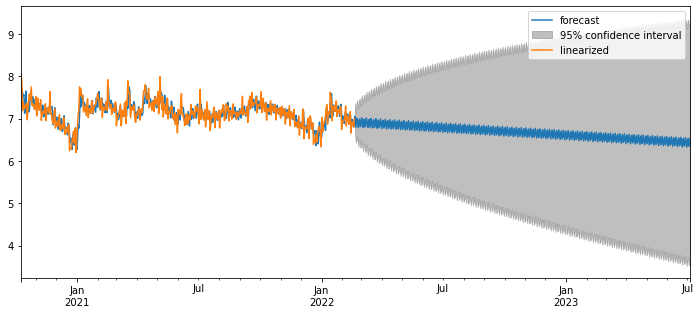

In [128]:
#arima.predict(end=700)
#fig = plt.gcf(); fig.set_size_inches(12, 5);
arima.plot_predict(end=1000);
fig = plt.gcf(); fig.set_size_inches(12, 5);

### Forecast

In [129]:
# Create a correct Training/Test split to predict the last 50 points
train_NRU = gmr_NRU['linearized'][0:350]
test_NRU = gmr_NRU['linearized'][350:]

# Build Model
arima = ARIMA(train_NRU, order=(4,0,7))
arima = arima.fit()

/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.33234D-01    |proj g|=  1.92437D-02

At iterate    5    f= -3.38898D-01    |proj g|=  8.86225D-03

At iterate   10    f= -3.41687D-01    |proj g|=  5.45481D-02

At iterate   15    f= -3.47495D-01    |proj g|=  2.47247D-02

At iterate   20    f= -3.49471D-01    |proj g|=  5.47221D-02

At iterate   25    f= -3.52630D-01    |proj g|=  1.41181D-02

At iterate   30    f= -3.53454D-01    |proj g|=  1.71364D-02

At iterate   35    f= -3.53754D-01    |proj g|=  1.29900D-02

At iterate   40    f= -3.54271D-01    |proj g|=  1.70271D-02

At iterate   45    f= -3.54475D-01    |proj g|=  2.99744D-02

At iterate   50    f= -3.55847D-01    |proj g|=  9.53023D-02

At iterate   55    f= -3.57376D-01    |proj g|=  7.12439D-02

At iterate   60    f= -3.60102D-01    |proj g|=  2.97243D-01

At iterate   65    f= -3.6


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  250    f= -3.68893D-01    |proj g|=  7.77459D-03

At iterate  255    f= -3.68895D-01    |proj g|=  1.05593D-02

At iterate  260    f= -3.68897D-01    |proj g|=  2.43757D-03

At iterate  265    f= -3.68897D-01    |proj g|=  1.96087D-03

At iterate  270    f= -3.68898D-01    |proj g|=  1.09128D-02

At iterate  275    f= -3.68898D-01    |proj g|=  5.89839D-04

At iterate  280    f= -3.68898D-01    |proj g|=  1.00173D-02

At iterate  285    f= -3.68898D-01    |proj g|=  3.05964D-03

At iterate  290    f= -3.68899D-01    |proj g|=  5.09275D-03

At iterate  295    f= -3.68899D-01    |proj g|=  4.22480D-03

At iterate  300    f= -3.68899D-01    |proj g|=  6.93584D-04

At iterate  305    f= -3.68900D-01    |proj g|=  4.13544D-03

At iterate  310    f= -3.68905D-01    |proj g|=  5.57699D-03

At iterate  315    f= -3.68905D-01    |proj g|=  2.75633D-02

At iterate  320    f= -3.68911D-01    |proj g|=  6.43331D-03

At iterate  325    f= -3.68911D-01    |proj g|=  4.31091D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  475    f= -3.68954D-01    |proj g|=  1.96708D-03

At iterate  480    f= -3.68955D-01    |proj g|=  2.26594D-03

At iterate  485    f= -3.68956D-01    |proj g|=  1.95047D-03

At iterate  490    f= -3.68956D-01    |proj g|=  2.55555D-03

At iterate  495    f= -3.68956D-01    |proj g|=  7.12103D-04

At iterate  500    f= -3.68956D-01    |proj g|=  2.65263D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    500    753      3     2     0   2.653D-03  -3.690D-01
  F = -0.36895643632608277     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [130]:
# Forecast
forecast_NRU, std_err, confidence_int = arima.forecast(len(test_NRU), alpha=0.05)  # 95% confidence

In [131]:
# We define here a "Plot forecast vs. real", which also shows historical train set

def plot_forecast(fc, train_NRU, test_NRU, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test_NRU.index)
    lower_series = pd.Series(upper, index=test_NRU.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test_NRU.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train_NRU, label='training', color='black')
    plt.plot(test_NRU, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

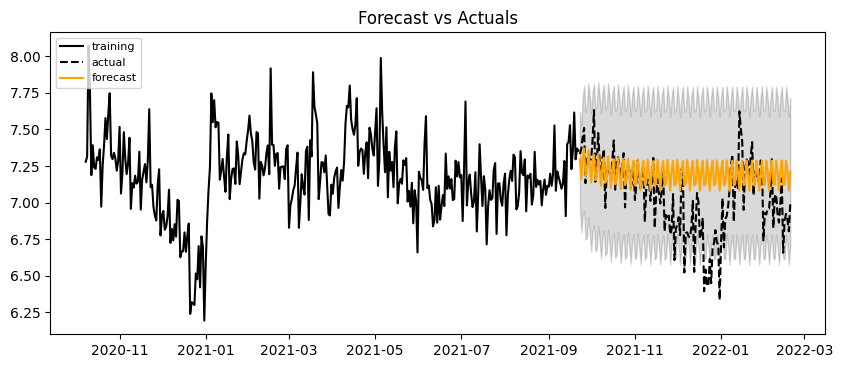

In [132]:
plot_forecast(forecast_NRU, train_NRU, test_NRU, confidence_int[:,0], confidence_int[:,1])

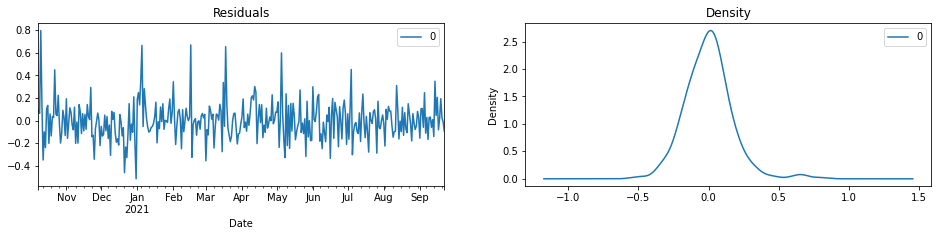

In [133]:
residuals_NRU = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals_NRU.plot(title="Residuals", ax=ax[0])
residuals_NRU.plot(kind='kde', title='Density', ax=ax[1]);

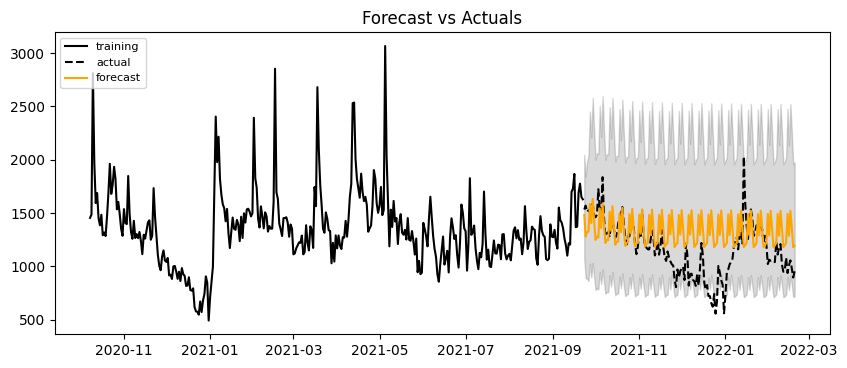

In [134]:
# re-compose back to initial time series
forecast_NRU_recons = np.exp(forecast_NRU)*result_mul.seasonal[350:]
train_NRU_recons = np.exp(train_NRU)*result_mul.seasonal[0:350]
test_NRU_recons = np.exp(test_NRU)*result_mul.seasonal[350:]
lower_NRU_recons = np.exp(confidence_int)[:,0]*result_mul.seasonal[350:]
upper_NRU_recons = np.exp(confidence_int)[:,1]*result_mul.seasonal[350:]

# plt 
plot_forecast(forecast_NRU_recons, train_NRU_recons, test_NRU_recons, lower_NRU_recons.values, upper_NRU_recons.values)


## Paying Users

### Training

#### Stationarize Data

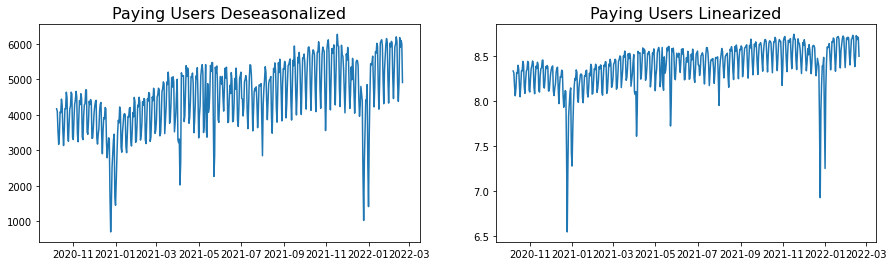

In [135]:
# Let's remove seasons
gmr_PU['deseasonalized'] = gmr_PU.PayingUsers.values/result_mul.seasonal

plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(gmr_PU.deseasonalized);
plt.title('Paying Users Deseasonalized', fontsize=16);

# Also remove exponential trend 
gmr_PU['linearized'] = np.log(gmr_PU['deseasonalized'])

plt.subplot(1,2,2); plt.plot(gmr_PU['linearized'])
plt.title('Paying Users Linearized', fontsize=16);

Text(0.5, 1.0, '2nd Order Differencing')

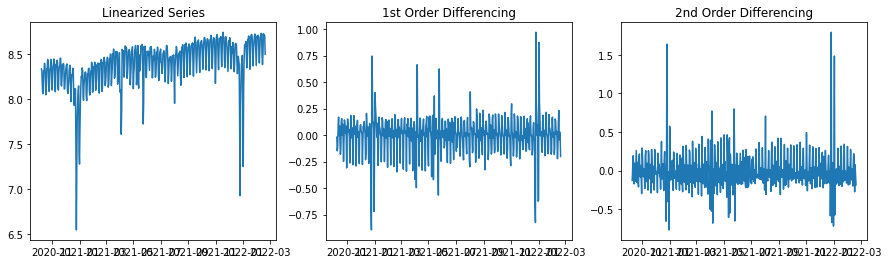

In [136]:
# Let's difference this and look at the ACFs
fig, axes = plt.subplots(1, 3,figsize=(15,4))

axes[0].plot(gmr_PU['linearized']); axes[0].set_title('Linearized Series')
# 1st Differencing
y_diff_PU = gmr_PU['linearized'].diff().dropna()
axes[1].plot(y_diff_PU); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
y_diff_diff_PU = gmr_PU['linearized'].diff().diff().dropna()
axes[2].plot(y_diff_diff_PU); axes[2].set_title('2nd Order Differencing')

In [137]:
# check with ADF Test for stationarity
print('p-value zero-diff: ', adfuller(gmr_PU['linearized'])[1])
print('p-value first-diff: ', adfuller(gmr_PU['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(gmr_PU['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.04858178086528748
p-value first-diff:  5.873920268903236e-13
p-value second-diff:  8.361508627745793e-19


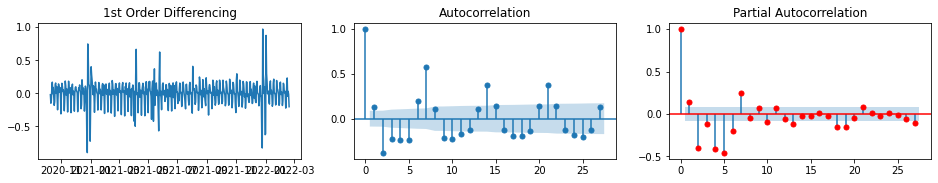

In [138]:
# ACF / PACF analysis of y_diff linearized
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff_PU); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff_PU, ax=axes[1]);
plot_pacf(y_diff_PU, ax=axes[2], c='r');

#### Train Data

In [139]:
arima_PU = ARIMA(gmr_PU["linearized"], order=(7,0,7))
arima = arima_PU.fit()
arima.summary()

/Users/ninadamaso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

smodel_PU = pm.auto_arima(gmr_PU['linearized'],
                       start_p=0, max_p=10,
                       start_q=10, max_q=20,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=-600.105, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-263.192, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-270.461, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-291.071, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-265.190, Time=0.04 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=-595.367, Time=1.68 sec
 ARIMA(1,1,10)(0,0,0)[0] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,1,11)(0,0,0)[0] intercept   : AIC=-598.401, Time=2.04 sec
 ARIMA(1,1,9)(0,0,0)[0] intercept   : AIC=-594.134, Time=1.81 sec
 ARIMA(1,1,11)(0,0,0)[0] intercept   : AIC=-596.282, Time=2.30 sec
 ARIMA(0,1,10)(0,0,0)[0]             : AIC=-601.059, Time=1.05 sec
 ARIMA(0,1,9)(0,0,0)[0]             : AIC=-596.680, Time=0.97 sec
 ARIMA(1,1,10)(0,0,0)[0]             : AIC=-595.401, Time=1.36 sec
 ARIMA(0,1,11)(0,0,0)[0]             : AIC=-599.117, Time=1.41 sec
 ARIMA(1,1,9)(0,0,0)[0]             : AIC=-600.436, Time=1.12 sec
 ARIMA(1,1,11)(0,0,0)[0]             : AIC=-597.160, Time=1.82 sec

Best model:  ARIMA(0,1,10)(0,0,0)[0]          
Total fit time: 19.563 seconds

### Evaluate

In [ ]:
arima.plot_predict(end=700);
fig = plt.gcf(); fig.set_size_inches(12, 5);

### Forecast

In [ ]:
# Create a correct Training/Test split to predict the last 50 points
train_PU = gmr_PU["linearized"][0:350]
test_PU = gmr_PU['linearized'][350:]

# Build Model
arima = ARIMA(train_PU, order=(0,1,10))  
arima = arima.fit()

# Forecast
forecast_PU, std_err, confidence_int = arima.forecast(len(test_PU), alpha=0.05)  # 95% confidence

In [ ]:
# We define here a "Plot forecast vs. real", which also shows historical train set

def plot_forecast(fc, train_PU, test_PU, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test_PU.index)
    lower_series = pd.Series(upper, index=test_PU.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test_PU.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train_PU, label='training', color='black')
    plt.plot(test_PU, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

In [ ]:
plot_forecast(forecast_PU, train_PU, test_PU, confidence_int[:,0], confidence_int[:,1])

In [ ]:
# re-compose back to initial time series
forecast_PU_recons = np.exp(forecast_PU)*result_mul.seasonal[350:]
train_PU_recons = np.exp(train_PU)*result_mul.seasonal[0:350]
test_PU_recons = np.exp(test_PU)*result_mul.seasonal[350:]
lower_PU_recons = np.exp(confidence_int)[:,0]*result_mul.seasonal[350:]
upper_PU_recons = np.exp(confidence_int)[:,1]*result_mul.seasonal[350:]

# plt 
plot_forecast(forecast_PU_recons, train_PU_recons, test_PU_recons, lower_PU_recons.values, upper_PU_recons.values)

In [ ]:
residuals_PU = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals_PU.plot(title="Residuals", ax=ax[0])
residuals_PU.plot(kind='kde', title='Density', ax=ax[1]);

## Active Users

### Training

#### Stationarize Data

In [ ]:
# Let's remove seasons
gmr_AU['deseasonalized'] = gmr_AU.ActiveUsers.values/result_mul.seasonal

plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(gmr_AU.deseasonalized);
plt.title('Active Users Deseasonalized', fontsize=16);

# Also remove exponential trend 
gmr_AU['linearized'] = np.log(gmr_AU['deseasonalized'])

plt.subplot(1,2,2); plt.plot(gmr_AU['linearized'])
plt.title('Active Users Linearized', fontsize=16);

In [ ]:
# Let's difference this and look at the ACFs
fig, axes = plt.subplots(1, 3,figsize=(15,4))

axes[0].plot(gmr_AU['linearized']); axes[0].set_title('Linearized Series')
# 1st Differencing
y_diff_AU = gmr_AU['linearized'].diff().dropna()
axes[1].plot(y_diff_AU); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
y_diff_diff_AU = gmr_AU['linearized'].diff().diff().dropna()
axes[2].plot(y_diff_diff_AU); axes[2].set_title('2nd Order Differencing')

In [ ]:
# check with ADF Test for stationarity
print('p-value zero-diff: ', adfuller(gmr_AU['linearized'])[1])
print('p-value first-diff: ', adfuller(gmr_AU['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(gmr_AU['linearized'].diff().diff().dropna())[1])

In [ ]:
# ACF / PACF analysis of y_diff linearized
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff_AU); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff_AU, ax=axes[1]);
plot_pacf(y_diff_AU, ax=axes[2], c='r');

#### Train Data

In [ ]:
arima_AU = ARIMA(gmr_AU['ActiveUsers'], order=(7,1,1))
arima = arima_AU.fit()
arima.summary()

smodel_AU = pm.auto_arima(gmr_AU['linearized'],
                       start_p=0, max_p=10,
                       start_q=0, max_q=10,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-326.971, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-475.241, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-599.784, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-328.970, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-598.025, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-597.994, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-596.044, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-601.446, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-599.681, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-599.651, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-477.235, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-597.756, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.588 seconds

### Evaluate Data

In [ ]:
arima.plot_predict(end=700);
fig = plt.gcf(); fig.set_size_inches(12, 5);

### Forecast

In [ ]:
# Create a correct Training/Test split to predict the last 50 points
train_AU = gmr_AU["linearized"][0:350]
test_AU = gmr_AU['linearized'][350:]

# Build Model
arima = ARIMA(train_AU, order=(0,1,1))  
arima = arima.fit()

# Forecast
forecast_AU, std_err, confidence_int = arima.forecast(len(test_AU), alpha=0.05)  # 95% confidence

In [ ]:
# We define here a "Plot forecast vs. real", which also shows historical train set

def plot_forecast(fc, train_AU, test_AU, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test_AU.index)
    lower_series = pd.Series(upper, index=test_AU.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test_AU.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train_AU, label='training', color='black')
    plt.plot(test_AU, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

In [ ]:
plot_forecast(forecast_AU, train_AU, test_AU, confidence_int[:,0], confidence_int[:,1])

In [ ]:
# re-compose back to initial time series
forecast_AU_recons = np.exp(forecast_AU)*result_mul.seasonal[350:]
train_AU_recons = np.exp(train_AU)*result_mul.seasonal[0:350]
test_AU_recons = np.exp(test_AU)*result_mul.seasonal[350:]
lower_AU_recons = np.exp(confidence_int)[:,0]*result_mul.seasonal[350:]
upper_AU_recons = np.exp(confidence_int)[:,1]*result_mul.seasonal[350:]

# plt 
plot_forecast(forecast_AU_recons, train_AU_recons, test_AU_recons, lower_AU_recons.values, upper_AU_recons.values)

In [ ]:
residuals_AU = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals_AU.plot(title="Residuals", ax=ax[0])
residuals_AU.plot(kind='kde', title='Density', ax=ax[1]);

# Results

<b>mape</b>: The <b>mean absolute percentage error</b> is a measure of how accurate a forecast system is. It measures this accuracy as a percentage.

<b>me</b>: The <b>mean error</b> shows the average of the difference between actual and forecasted values.

<b>mae</b>: The <b>mean absolute error</b> takes the sum of the absolute difference from actual to forecast and averages them. It is less sensitive to the occasional very large error because it does not square the errors in the calculation.

<b>mpe</b>: The <b>mean Percentage Error</b> shows the average of the percent difference between actual and forecasted values. Both the ME and MPE will help indicate whether the forecasts are biased to be disproportionately positive or negative.

<b>rmse</b>: The <b>root mean squared error</b> represents the sample standard deviation of the differences between predicted values and observed values.

<b>corr</b>: <b>Correlation</b> between the test set and the forecast.

## New Registered Users

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast_NRU_recons - np.array(test_NRU_recons))/np.abs(np.array(test_NRU_recons)))  # MAPE
    me = np.mean(forecast_NRU_recons - np.array(test_NRU_recons))             # ME
    mae = np.mean(np.abs(forecast_NRU_recons - np.array(test_NRU_recons)))    # MAE
    mpe = np.mean((forecast_NRU_recons - np.array(test_NRU_recons))/np.array(test_NRU_recons))   # MPE
    rmse = np.mean((forecast_NRU_recons - np.array(test_NRU_recons))**2)**.5  # RMSE
    corr = np.corrcoef(forecast_NRU_recons, np.array(test_NRU_recons))[0,1]   # corr
                    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(forecast_NRU_recons, np.array(test_NRU_recons))

## Paying Users

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast_PU_recons - np.array(test_PU_recons))/np.abs(np.array(test_PU_recons)))  # MAPE
    me = np.mean(forecast_PU_recons - np.array(test_PU_recons))             # ME
    mae = np.mean(np.abs(forecast_PU_recons - np.array(test_PU_recons)))    # MAE
    mpe = np.mean((forecast_PU_recons - np.array(test_PU_recons))/np.array(test_PU_recons))   # MPE
    rmse = np.mean((forecast_PU_recons - np.array(test_PU_recons))**2)**.5  # RMSE
    corr = np.corrcoef(forecast_PU_recons, np.array(test_PU_recons))[0,1]   # corr                   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(forecast_PU_recons, np.array(test_PU_recons))

## Active Users

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast_AU_recons - np.array(test_AU_recons))/np.abs(np.array(test_AU_recons)))  # MAPE
    me = np.mean(forecast_AU_recons - np.array(test_AU_recons))             # ME
    mae = np.mean(np.abs(forecast_AU_recons - np.array(test_AU_recons)))    # MAE
    mpe = np.mean((forecast_AU_recons - np.array(test_AU_recons))/np.array(test_AU_recons))   # MPE
    rmse = np.mean((forecast_AU_recons - np.array(test_AU_recons))**2)**.5  # RMSE
    corr = np.corrcoef(forecast_AU_recons, np.array(test_AU_recons))[0,1]   # corr                   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(forecast_AU_recons, np.array(test_AU_recons))